<a href="https://colab.research.google.com/github/reidnclark/volatility-forecast/blob/main/mean_reversion_trading_algorithm_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [20]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', None)

**Function**: Get Data

In [21]:
def get_data(tickers_list: list[str], start_date: str, end_date: str) -> pd.DataFrame:

  data = yf.download(tickers_list, start=start_date, end=end_date, progress=False)

  adj_close = pd.DataFrame(data['Adj Close'])
  adj_close.index = adj_close.index.date

  return adj_close

Function: Get Moving Averages

In [22]:
def get_moving_avg(price_data: pd.DataFrame, shorter_moving_avg_interval: int,
                   longer_moving_avg_interval: int) -> tuple:

  moving_avg_shorter = price_data.rolling(window=shorter_moving_avg_interval).mean()
  moving_avg_longer = price_data.rolling(window=longer_moving_avg_interval).mean()
  moving_avgs = pd.DataFrame(index=price_data.index)

  for ticker in price_data.columns:
        moving_avgs[f'{ticker}_shorter'] = moving_avg_shorter[ticker]
        moving_avgs[f'{ticker}_longer'] = moving_avg_longer[ticker]

  return moving_avgs

Function: Plot

In [23]:
def plot_results(price_data: pd.DataFrame, plot_colours: list[str], plot_line_widths: list[float],
                 plot_line_styles: list[str]):

  plt.figure(figsize=(10,5), facecolor='lightgray')

  for i, ticker in enumerate(price_data.columns):
    plt.plot(price_data.index, price_data[ticker], linewidth=plot_line_widths[i], linestyle=plot_line_styles[i],
             color=plot_colours[i], label=ticker)

  plt.grid(True, linestyle='-', alpha=0.2)
  plt.title(f'Historical Price for {price_data.columns}')
  plt.legend()
  plt.show()

**Input**: Portfolio Ticker, Period

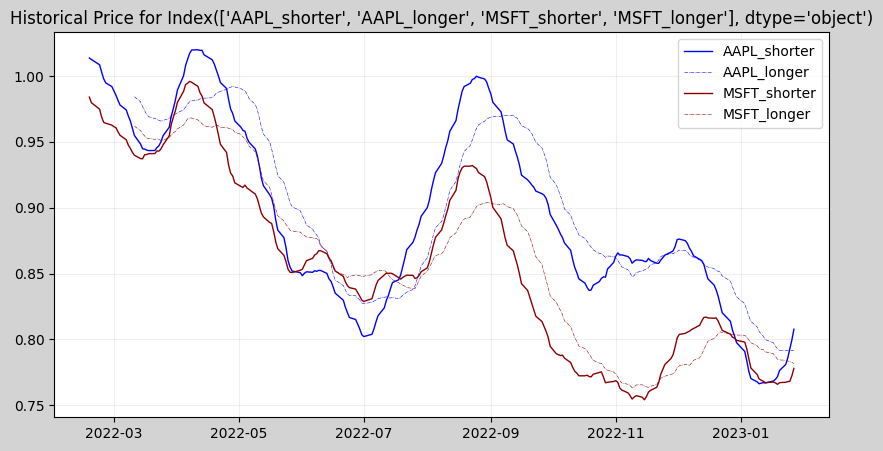

In [25]:
tickers_list = ['MSFT', 'AAPL'] # DEFAULT

start_date = '2022-01-28' # DEFAULT
end_date = '2023-01-28' # DEFAULT
shorter_rolling_interval = 15 # DEFAULT (NUMBER OF DAYS)
longer_rolling_interval = 30 # DEFAULT (NUMBER OF DAYS)

plot_colours = ['blue', 'blue', 'darkred', 'darkred'] # DEFAULT
plot_line_widths = [1,0.4,1,0.4]
plot_line_styles = ['-','-.','-','-.']

adj_close = get_data(tickers_list, start_date, end_date)
normalized_adj_close = adj_close / adj_close.iloc[0]

moving_avgs = get_moving_avg(normalized_adj_close, shorter_rolling_interval, longer_rolling_interval)


plot_results(moving_avgs, plot_colours, plot_line_widths, plot_line_styles)